In [1]:
import requests

dtm_link_list = "https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MAP_ES_2012_2015_MDT_URL_LIST.txt"


textstring = requests.get(dtm_link_list).text.splitlines()

print(textstring)

8_787.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_787.img', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_787.rrd', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_788.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_788.img', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_788.rrd', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_789.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_789.img', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_789.rrd', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_790.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_790.img', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_790.rrd', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_791.igw', 'https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDT/38_791.img', 

In [16]:
dsm_link_list = "https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MAP_ES_2012_2015_MDE_URL_LIST.txt"


textstring = requests.get(dsm_link_list).text

print(textstring)

ttps://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_785.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.rrd
https://geobases.static.es.gov.br/pu

In [19]:
import subprocess, json

sample_url = "https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/39_781.img"


def  parseGdalinfoJson(inputpath,print_runstring=False,from_www=True,optionals = '',print_outstring=False):
    '''
        Parse GDALINFO from a OGR compliant image as json. The image can be web-hosted or no.
    '''

    url_preffix = ''

    if from_www:
        url_preffix = '/vsicurl/'

    # if quoted_path:
    #     inputpath = '"'+inputpath+'"'

    runstring = f'gdalinfo "{url_preffix}{inputpath}" -json -stats -checksum {optionals}'

    if print_runstring:
        print(runstring)
    
    out = subprocess.run(runstring,shell=True,stdout=subprocess.PIPE)

    as_str = out.stdout.decode('utf-8').replace('\\n','')

    if print_outstring:
        print(as_str)

    as_dict = json.loads(as_str)

    return as_dict


In [20]:
stats_dict_sample = parseGdalinfoJson(sample_url,print_runstring=True,print_outstring=True)

gdalinfo "/vsicurl/https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/39_781.img" -json -stats -checksum 
{
  "description":"\/vsicurl\/https:\/\/geobases.static.es.gov.br\/public\/MAP_ES_2012_2015\/MDE\/39_781.img",
  "driverShortName":"HFA",
  "driverLongName":"Erdas Imagine Images (.img)",
  "files":[
    "\/vsicurl\/https:\/\/geobases.static.es.gov.br\/public\/MAP_ES_2012_2015\/MDE\/39_781.img",
    "\/vsicurl\/https:\/\/geobases.static.es.gov.br\/public\/MAP_ES_2012_2015\/MDE\/39_781.rrd"
  ],
  "size":[
    5002,
    5002
  ],
  "coordinateSystem":{
    "wkt":"BOUNDCRS[    SOURCECRS[        PROJCRS[\"SIRGAS_2000_UTM_Zone_24S\",            BASEGEOGCRS[\"SIRGAS_2000\",                DATUM[\"Sistema de Referencia Geocentrico para las AmericaS 2000\",                    ELLIPSOID[\"GRS_1980\",6378137,298.257222101004,                        LENGTHUNIT[\"metre\",1]],                    ID[\"EPSG\",6674]],                PRIMEM[\"Greenwich\",0,                    ANGLEUNIT[

In [86]:
 with open('test_gdalinfo_out.json','w+') as handle:
    json.dump(stats_dict_sample,handle)

pol_as_list = stats_dict_sample['wgs84Extent']['coordinates'][0]
print(pol_as_list)



[[-40.0502443, -19.8027731], [-40.050839, -19.8931624], [-39.9552822, -19.8937009], [-39.9547415, -19.803309], [-40.0502443, -19.8027731]]


In [26]:
print(stats_dict_sample['bands'][0]['checksum'])


for band in stats_dict_sample['bands']:
    print(band['checksum'])

48913
48913


In [6]:
from shapely.geometry import Polygon

In [7]:
sample_pol = Polygon(pol_as_list)

print(sample_pol)

POLYGON ((-40.0502443 -19.8027731, -40.050839 -19.8931624, -39.9552822 -19.8937009, -39.9547415 -19.803309, -40.0502443 -19.8027731))


In [29]:
import numpy as np

pol_as_np = np.array(pol_as_list)

pol_as_np2 = np.array(pol_as_list) + 0.15

print(pol_as_np)
print(pol_as_np2)

[[-40.0502443 -19.8027731]
 [-40.050839  -19.8931624]
 [-39.9552822 -19.8937009]
 [-39.9547415 -19.803309 ]
 [-40.0502443 -19.8027731]]
[[-39.9002443 -19.6527731]
 [-39.900839  -19.7431624]
 [-39.8052822 -19.7437009]
 [-39.8047415 -19.653309 ]
 [-39.9002443 -19.6527731]]


In [9]:
sample_pol2 = Polygon(pol_as_np)

print(sample_pol2)

sample_pol3 = Polygon(pol_as_np2)

print(sample_pol3)

POLYGON ((-39.9502443 -19.7027731, -39.950839 -19.7931624, -39.8552822 -19.7937009, -39.8547415 -19.703309, -39.9502443 -19.7027731))
POLYGON ((-39.9002443 -19.6527731, -39.900839 -19.7431624, -39.8052822 -19.7437009, -39.8047415 -19.653309, -39.9002443 -19.6527731))


In [10]:
print(sample_url)

https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/39_781.img


In [11]:
import wget

wget.download(sample_url,'sample_img.img')

'sample_img (1).img'

In [12]:
import os
from urllib.parse import urlparse

a = urlparse(sample_url)
print(a.path)                    
print(os.path.basename(a.path))  

b = urlparse(sample_url).path


/public/MAP_ES_2012_2015/MDE/39_781.img
39_781.img


In [13]:
print(textstring)

ttps://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_785.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_786.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_787.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_788.rrd
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.img
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.img.xml
https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/38_789.rrd
https://geobases.static.es.gov.br/pu

In [14]:
print(sample_url)

https://geobases.static.es.gov.br/public/MAP_ES_2012_2015/MDE/39_781.img


  url                                           geometry
0   h  POLYGON ((-39.90024 -19.65277, -39.90084 -19.7...
1   t  POLYGON ((-39.95024 -19.70277, -39.95084 -19.7...
2   t  POLYGON ((-39.90024 -19.65277, -39.90084 -19.7...


<AxesSubplot:>

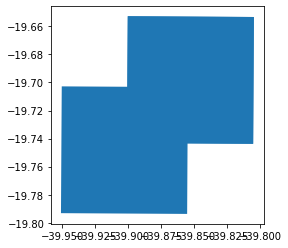

In [62]:
from geopandas import GeoDataFrame

# HERE FOR GEODATAFRAME

data = {'url':[textstring[0],textstring[1],textstring[2],],'geometry':[sample_pol3,sample_pol2,sample_pol3]}

sample_gdf = GeoDataFrame(data,crs="EPSG:4326")

print(sample_gdf)

sample_gdf.plot()

In [43]:
import random

for i in range(5):
    print(random.uniform(-1,1))

0.66571784089852
-0.21032390306684645
0.775309278247815
-0.4359647530517776
-0.4329757662441709


<AxesSubplot:>

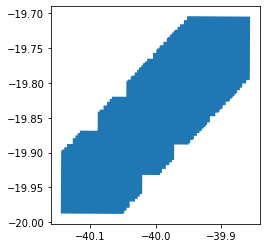

In [82]:


data = {'url':[],'geometry':[]}
pol_as_np = np.array(pol_as_list)


for i in range(50):
    data['url'].append(str(i))
    data['geometry'].append(Polygon(pol_as_np+random.uniform(-.1,.1)))


sample_gdf = GeoDataFrame(data,crs="EPSG:4326")

# print(sample_gdf)

sample_gdf.plot()

In [83]:
intersect = sample_gdf.intersects(sample_pol3)

print(intersect)

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15     True
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27     True
28    False
29    False
30    False
31    False
32     True
33    False
34    False
35     True
36     True
37     True
38    False
39    False
40     True
41    False
42    False
43     True
44    False
45    False
46    False
47     True
48     True
49    False
dtype: bool


In [84]:
sample_gdf[intersect]

,url,geometry
3,3,"POLYGON ((-39.97894 -19.73147, -39.97954 -19.8..."
7,7,"POLYGON ((-39.97294 -19.72547, -39.97353 -19.8..."
13,13,"POLYGON ((-39.98296 -19.73549, -39.98356 -19.8..."
15,15,"POLYGON ((-39.98335 -19.73588, -39.98394 -19.8..."
16,16,"POLYGON ((-39.95256 -19.70509, -39.95316 -19.7..."
23,23,"POLYGON ((-39.96330 -19.71582, -39.96389 -19.8..."
27,27,"POLYGON ((-39.97774 -19.73027, -39.97834 -19.8..."
32,32,"POLYGON ((-39.96688 -19.71941, -39.96747 -19.8..."
35,35,"POLYGON ((-39.97531 -19.72784, -39.97591 -19.8..."
36,36,"POLYGON ((-39.95732 -19.70985, -39.95791 -19.8..."
